<a href="https://colab.research.google.com/github/asyahdin/Introduction-to-Python/blob/main/SecProjectCarPrice_Regression_220724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICT CAR PRICE**

In [40]:
link = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

import pandas as pd

df = pd.read_csv(link)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [42]:
df.isnull().sum()


symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [43]:
df['stroke'].isnull().sum() # to know missing value on stroke why it is NaN

4

In [44]:
import numpy as np # to change storke from NaN to numbers

df['stroke'].replace(np.nan, df['stroke'].mean(), inplace=True) #to change

In [45]:
df.describe(include='all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [46]:
#Select all numeric features

df_numeric = df.select_dtypes(include=['number'])

df_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.007992,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055127,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.157964,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123913,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188814,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060822,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167412,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205806,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.098282,-0.063388,-0.034079,-0.034741,0.082267,0.036285,0.241033,-0.241033


In [47]:
df[['engine-size', 'city-mpg', 'bore', 'stroke', 'horsepower', 'price', 'diesel','gas','city-L/100km','highway-mpg']].corr()

,engine-size,city-mpg,bore,stroke,horsepower,price,diesel,gas,city-L/100km,highway-mpg
engine-size,1.000000,-0.650546,0.572609,0.205806,0.822676,0.872335,0.070779,-0.070779,0.745059,-0.679571
city-mpg,-0.650546,1.000000,-0.582027,-0.034079,-0.822214,-0.686571,0.265676,-0.265676,-0.949713,0.972044
bore,0.572609,-0.582027,1.000000,-0.055390,0.566936,0.543155,0.054458,-0.054458,0.554610,-0.591309
stroke,0.205806,-0.034079,-0.055390,1.000000,0.098282,0.082267,0.241033,-0.241033,0.036285,-0.034741
horsepower,0.822676,-0.822214,0.566936,0.098282,1.000000,0.809575,-0.169053,0.169053,0.889488,-0.804575
price,0.872335,-0.686571,0.543155,0.082267,0.809575,1.000000,0.110326,-0.110326,0.789898,-0.704692
diesel,0.070779,0.265676,0.054458,0.241033,-0.169053,0.110326,1.000000,-1.000000,-0.241282,0.198690
gas,-0.070779,-0.265676,-0.054458,-0.241033,0.169053,-0.110326,-1.000000,1.000000,0.241282,-0.198690
city-L/100km,0.745059,-0.949713,0.554610,0.036285,0.889488,0.789898,-0.241282,0.241282,1.000000,-0.930028
highway-mpg,-0.679571,0.972044,-0.591309,-0.034741,-0.804575,-0.704692,0.198690,-0.198690,-0.930028,1.000000


In [48]:
import pandas as pd

def calculate_and_sort_correlations(data, target_feature):
    """
    Calculate the correlation of the target_feature to all other features
    and sort them in ascending order.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    target_feature (str): The feature to calculate correlations against.

    Returns:
    pd.Series: Correlations of target_feature with other features, sorted in ascending order.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr(numeric_only=True)

    # Extract the correlations for the target feature
    correlations = correlation_matrix[target_feature]

    # Drop the target feature itself
    correlations = correlations.drop(target_feature)

    # Sort the correlations in ascending order
    sorted_correlations = correlations.sort_values(ascending=True)

    return sorted_correlations

In [49]:
calculate_and_sort_correlations(df, 'price')

highway-mpg         -0.704692
city-mpg            -0.686571
gas                 -0.110326
peak-rpm            -0.101616
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082267
diesel               0.110326
normalized-losses    0.133999
height               0.135486
bore                 0.543155
wheel-base           0.584642
length               0.690628
width                0.751265
city-L/100km         0.789898
horsepower           0.809575
curb-weight          0.834415
engine-size          0.872335
Name: price, dtype: float64

<Axes: xlabel='engine-size', ylabel='price'>

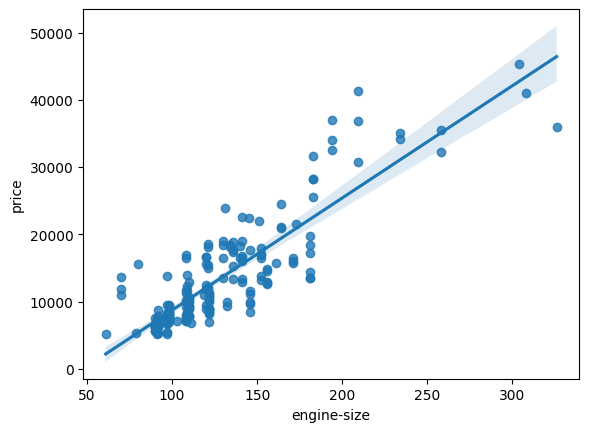

In [50]:
#plot

from matplotlib import pyplot as plt
import seaborn as sns

sns.regplot(x='engine-size', y='price', data=df) #postive corr

<Axes: xlabel='city-mpg', ylabel='price'>

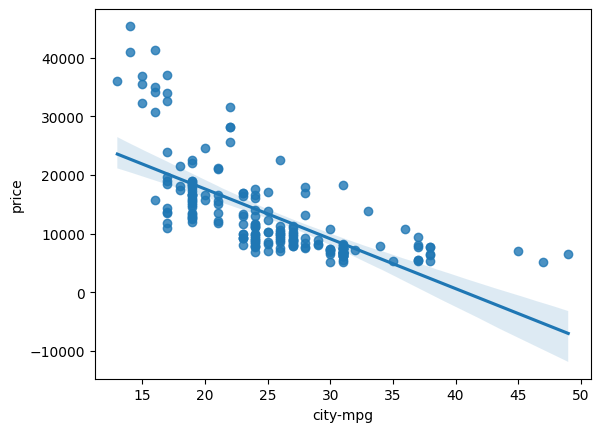

In [51]:
sns.regplot(x="city-mpg", y="price", data=df)

<Axes: xlabel='bore', ylabel='price'>

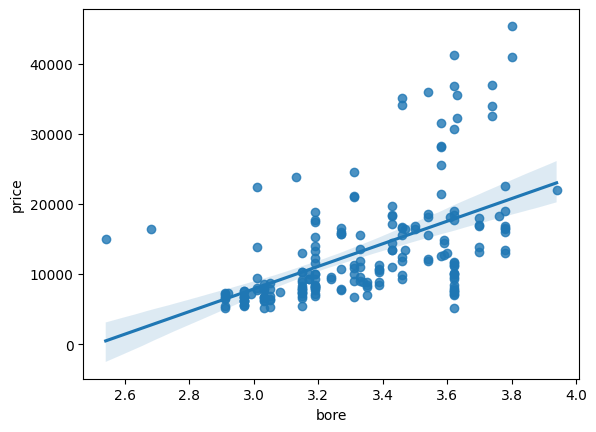

In [52]:
sns.regplot(x='bore', y='price', data=df) #postive corr

<Axes: xlabel='stroke', ylabel='price'>

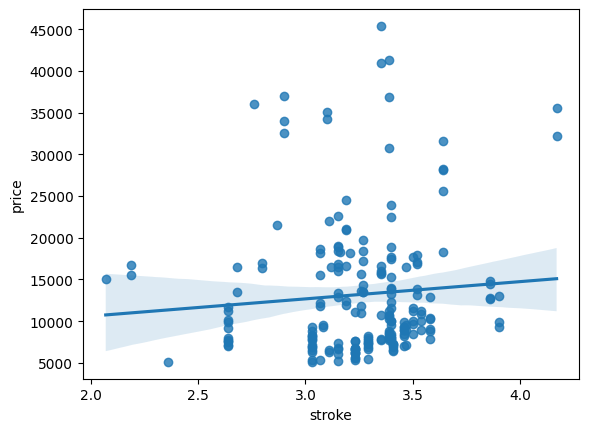

In [53]:
sns.regplot(x='stroke', y='price', data=df) #postive corr

<Axes: xlabel='horsepower', ylabel='price'>

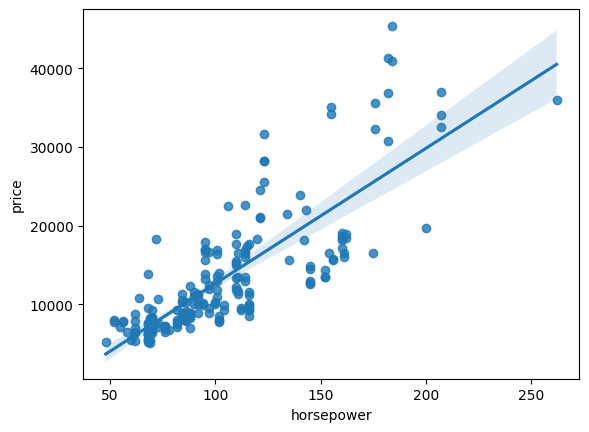

In [54]:
sns.regplot(x='horsepower', y='price', data=df) #postive corr

<Axes: xlabel='diesel', ylabel='price'>

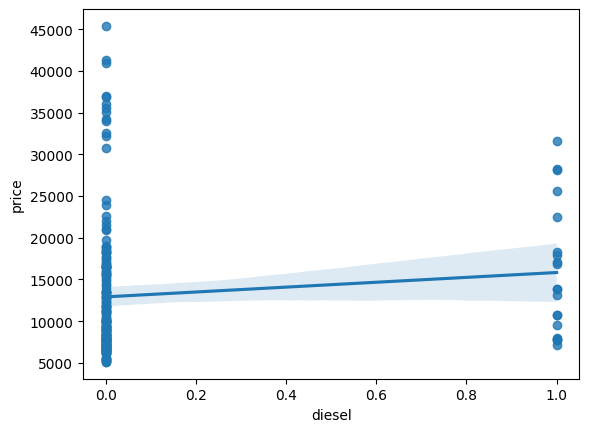

In [55]:
sns.regplot(x="diesel", y="price", data=df)

<Axes: xlabel='gas', ylabel='price'>

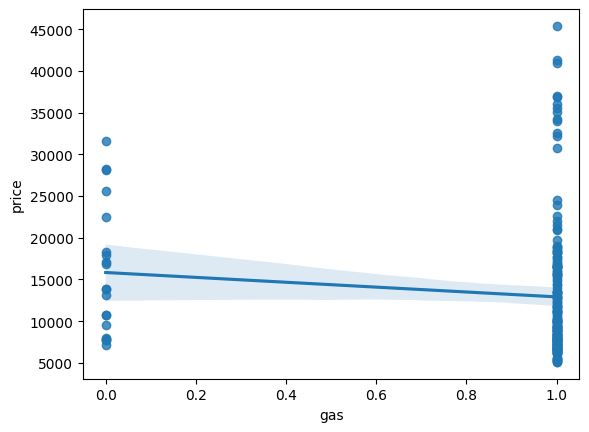

In [56]:
sns.regplot(x="gas", y="price", data=df)

<Axes: xlabel='highway-mpg', ylabel='price'>

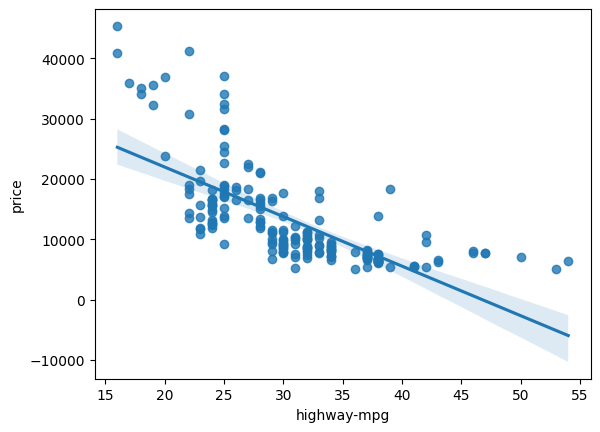

In [57]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [58]:
#visualize correlation statistic
import scipy.stats as st

correlation, p_value = st.pearsonr(df['highway-mpg'], df['price'])
print('The correlation is: ', correlation, 'and the p_value is: ', p_value)

The correlation is:  -0.704692265058953 and the p_value is:  1.749547114447557e-31


<Axes: xlabel='city-L/100km', ylabel='price'>

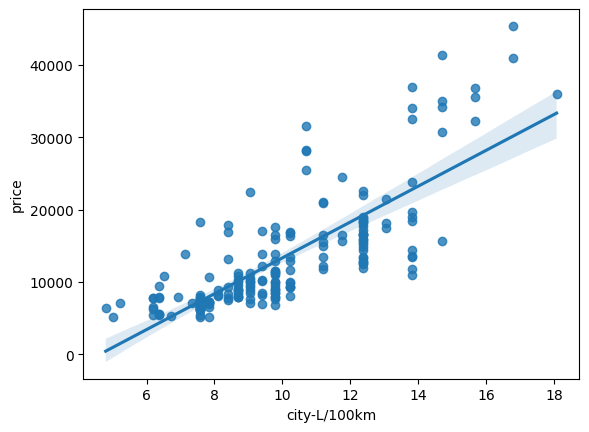

In [59]:
sns.regplot(x="city-L/100km", y="price", data=df)

In [60]:
correlation, p_value = st.pearsonr(df['city-L/100km'], df['price'])
print('The correlation is: ', correlation, 'and the p_value is: ', p_value)

The correlation is:  0.7898975136626943 and the p_value is:  3.9031064009394357e-44


In [73]:
#DIVIDE datasets into train and test

import numpy as np

#msk - check length of datasets and find lower of datasets under variables
#the lenght of datasets is less than 80% to be chosen randomly
msk = np.random.rand(len(df)) < 0.8
train = df[msk] #takes 80% of datasets
test = df[~msk] #takes 20% of datasets

In [74]:
from sklearn import linear_model

#call the algorithms and assign it to a variable
regr = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['engine-size']])
train_y = np.asanyarray(train[['price']])

#fit the model to the training dataset

regr.fit(train_x, train_y)

#print slope and y-intercept
print ('The value of the slope is: ', regr.coef_)
print ('The value of the intercept is: ', regr.intercept_)

The value of the slope is:  [[162.48189291]]
The value of the intercept is:  [-7463.34554097]


Text(0, 0.5, 'price')

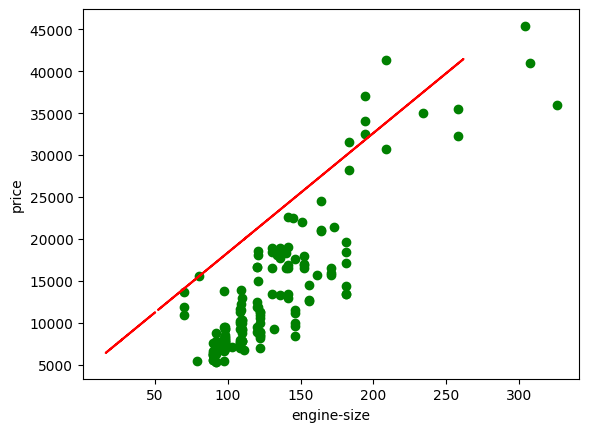

In [90]:
#best fit line by the Algorithm

plt.scatter(train['engine-size'], train['price'], color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green

plt.xlabel('engine-size')
plt.ylabel('price')

In [76]:
from sklearn.metrics import r2_score

#testing data
test_x = np.asanyarray(test[['engine-size']])
test_y = np.asanyarray(test[['price']])

#predict the value base on x value
test_y_ = regr.predict(test_x)

print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))


The R2 is:  76.86
The MSE is:  1302381600.32
The MAE is:  266732.18


*MSE high means that many outliers*

*The higher the R2, the better model*

*Can remove outliersto low the values if want*

In [78]:
#call the algorithms and assign it to a variable
regr = linear_model.LinearRegression()

#convert the dataframe to an array
train_x = np.asanyarray(train[['horsepower','highway-mpg']])
train_y = np.asanyarray(train[['price']])

#fit the model to the training dataset

regr.fit(train_x, train_y)

#print slope and y-intercept
print ('The value of the slope is: ', regr.coef_)
print ('The value of the intercept is: ', regr.intercept_)

The value of the slope is:  [[ 142.42929603 -193.66757491]]
The value of the intercept is:  [4141.33079556]


In [79]:
#testing data
test_x = np.asanyarray(test[['horsepower', 'highway-mpg']])
test_y = np.asanyarray(test[['price']])

#predict the value base on x value
test_y_ = regr.predict(test_x)

print('The R2 is: ', round (((r2_score(test_y, test_y_))*100),2))
print('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100), 2))
print('The MAE is: ', round(((np.mean(np.absolute(test_y_ - test_y))))*100, 2))

The R2 is:  66.86
The MSE is:  1864575720.03
The MAE is:  305647.29


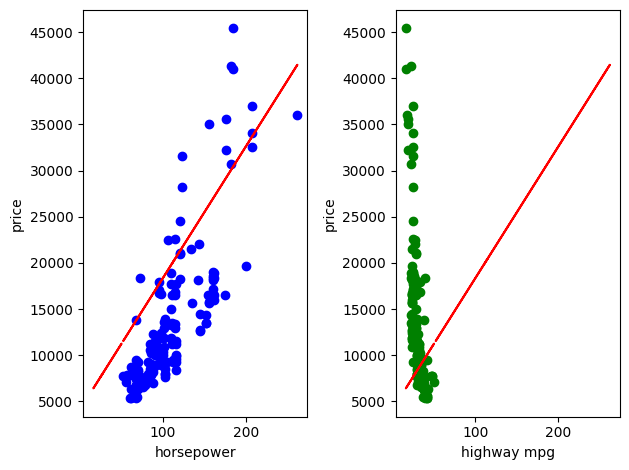

In [85]:
plt.subplot(1, 2, 1)

plt.scatter(train['horsepower'], train['price'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("horsepower")
plt.ylabel("price")

plt.subplot(1, 2, 2)

plt.scatter(train['highway-mpg'], train['price'],  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("highway mpg")
plt.ylabel("price")

plt.tight_layout()
plt.show()

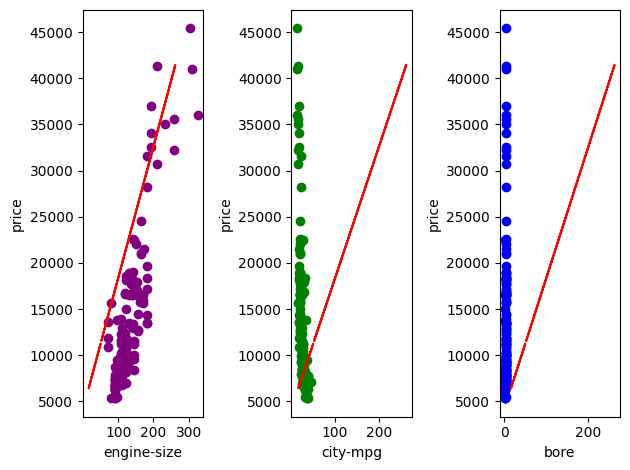

In [83]:
plt.subplot(1, 3, 1)

plt.scatter(train['engine-size'], train['price'],  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("engine-size")
plt.ylabel("price")

plt.subplot(1, 3, 2)

plt.scatter(train['city-mpg'], train['price'],  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("city-mpg")
plt.ylabel("price")

plt.subplot(1, 3, 3)

plt.scatter(train['bore'], train['price'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("bore")
plt.ylabel("price")


plt.tight_layout()
plt.show()

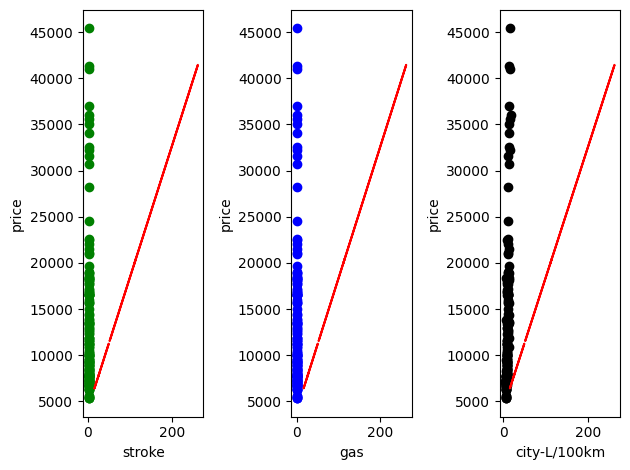

In [88]:
plt.subplot(1, 3, 1)

plt.scatter(train['stroke'], train['price'],  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("stroke")
plt.ylabel("price")

plt.subplot(1, 3, 2)

plt.scatter(train['gas'], train['price'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("gas")
plt.ylabel("price")

plt.subplot(1, 3, 3)

plt.scatter(train['city-L/100km'], train['price'],  color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("city-L/100km")
plt.ylabel("price")


plt.tight_layout()
plt.show()